# Making sure we have the relevant api's installed

In [860]:
pip install quandl

Note: you may need to restart the kernel to use updated packages.


In [861]:
pip install fredapi

Note: you may need to restart the kernel to use updated packages.


In [903]:
# I first, imported the relevant modules
import quandl
from fredapi import Fred

import matplotlib.pyplot as plt

import requests
import json
import collections
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import os
import lxml
from getpass import getpass


today = datetime.datetime.now()


In [904]:
my_quandl_API = getpass()

········


In [905]:
quandl.ApiConfig.api_key = my_quandl_API

In [906]:
my_FRED_API = getpass()

········


In [907]:
fred = Fred(api_key=my_FRED_API)

# Data Summary
0.	Inflation ( link ) Quandl
1.	M2_growth ( link ) FRED
2.	USD ( link ) Quandl
3.	WTI ( link ) Quandl
4.	wages  :: I need to decide which one \
b.	Consumer Price Index for All Urban Wage Earners and Clerical Workers ( link ) FRED\
c.	Compensation of Employees, Received: Wage and Salary Disbursements ( link ) FRED\
d.	Average Hourly Earnings of All Employees, Total Private ( link ) FRED\
i.	Limited time horizon
5.	US_GDP ( link ) FRED
6.	cap_util ( link ) FRED
7.	Home_Price ( link ) FRED

# Daily

USD ( link ) Yahoo Finance \
WTI ( link ) Investing.com

# Weekly

M2_growth ( link ) FRED

# Monthly 

Inflation Quandl\
wages  :: I need to decide which one

b.	Consumer Price Index for All Urban Wage Earners and Clerical Workers FRED \
c.	Compensation of Employees, Received: Wage and Salary Disbursements FRED \
d.	Average Hourly Earnings of All Employees, Total Private FRED 

cap_util FRED \
Home_Price FRED

# Quarterly
US_GDP FRED \
US Velocity of Money FRED



# 1.0 Pulling it all in

**Number 0 | Inflation**

In [908]:
us_cpi = quandl.get('RATEINF/INFLATION_USA')

# check to see it's working
# print(us_cpi.head(2))

# print(us_cpi.tail(10))
# us_cpi.info()

**Number 1 | M2**

In [909]:
us_M2 = fred.get_series('M2')

# print(us_M2.head(2))
# print(us_M2.tail(10))

**Number 2 | USD**

In [910]:
us_usd = quandl.get('CHRIS/ICE_DX1')

# print(us_usd.head(2))
# print(us_usd.tail(10))

**Number 3 | WTI**

In [911]:
us_wti = quandl.get('CHRIS/CME_CL1')

# print(us_wti.head(2))
# print(us_wti.tail(10))

**Number 4 | wages**

In [912]:
# this is a CPI & may be a component of CPI
us_wages_cpi_us_average = fred.get_series('CWSR0000SA0')

# print(us_wages_cpi_us_average.head(2))
# print(us_wages_cpi_us_average.tail(10))

In [913]:
us_wages_compensation = fred.get_series('A576RC1')

# print(us_wages_compensation.head(2))
# print(us_wages_compensation.tail(10))

In [914]:
us_wages_hourly_earnings = fred.get_series('CES0500000003')

# print(us_wages_hourly_earnings.head(2))
# print(us_wages_hourly_earnings.tail(10))

**Number 5 | US GDP**

In [915]:
us_gdp = fred.get_series('GDP')

# print(us_gdp.head(2))
# print(us_gdp.tail(10))

**Number 6 | US Capital Utilization**

In [916]:
us_cap_util = fred.get_series('TCU')

# print(us_cap_util.head(2))
# print(us_cap_util.tail(10))

**Number 7 | Home Price**

In [917]:
us_re = fred.get_series('CSUSHPINSA')

# print(us_re.head(2))
# print(us_re.tail(10))

**Number 8 | Velocity of Money**

In [918]:
us_velocity = fred.get_series('M2V')

# print(us_velocity.head(2))
# print(us_velocity.tail(10))

# 2.0 Pushing them into the Main DataFrame called "MASTER_unchanged"

In [919]:
print('us_cpi type |', type(us_cpi))
print('us_M2 type  | ', type(us_M2))
print('us_usd type  | ', type(us_usd))
print('us_wti type  | ', type(us_wti))
print('us_wages_cpi_us_average type  | ', type(us_wages_cpi_us_average))
print('us_wages_compensation type  | ', type(us_wages_compensation))
print('us_wages_hourly_earnings type  | ', type(us_wages_hourly_earnings))
print('us_gdp type  | ', type(us_gdp))
print('us_cap_util type  | ', type(us_cap_util))
print('us_re type  | ', type(us_re))
print('us_velocity type  | ', type(us_velocity))

us_cpi type | <class 'pandas.core.frame.DataFrame'>
us_M2 type  |  <class 'pandas.core.series.Series'>
us_usd type  |  <class 'pandas.core.frame.DataFrame'>
us_wti type  |  <class 'pandas.core.frame.DataFrame'>
us_wages_cpi_us_average type  |  <class 'pandas.core.series.Series'>
us_wages_compensation type  |  <class 'pandas.core.series.Series'>
us_wages_hourly_earnings type  |  <class 'pandas.core.series.Series'>
us_gdp type  |  <class 'pandas.core.series.Series'>
us_cap_util type  |  <class 'pandas.core.series.Series'>
us_re type  |  <class 'pandas.core.series.Series'>
us_velocity type  |  <class 'pandas.core.series.Series'>


In [922]:
us_M2_df = us_M2.to_frame()

us_wages_cpi_df = us_wages_cpi_us_average.to_frame()
us_wages_compensation_df = us_wages_compensation.to_frame()
us_wages_hrly_earn_df = us_wages_hourly_earnings.to_frame()
us_gdp_df = us_gdp.to_frame()
us_cap_util_df = us_cap_util.to_frame()
us_re_df = us_re.to_frame()
us_velocity_df = us_velocity.to_frame()

# print(type(us_M2_df))

In [923]:
main_df = pd.concat([us_cpi,us_usd['Open'],us_wti['Last'],us_M2_df,us_gdp_df,us_velocity_df,us_cap_util_df,us_re_df,us_wages_cpi_df,us_wages_compensation_df,us_wages_hrly_earn_df], axis=1, 
    ignore_index=True,
    )

main_df = main_df.fillna(method='ffill')
main_df.columns = ['Inflation','USD','WTI','M2','GDP','$ Velocity','Cap Util','Real Estate','Wages CPI','Wages Compensation','Hrly Earnings']
main_df.index.names = ["Date"]

# print(main_df.tail())

In [924]:
# creating the 'MASTER_unchanged' for referance purposes

MASTER_unchanged = pd.DataFrame(main_df)
MASTER_unchanged.to_excel('data/2.0_MASTER_unchanged/MASTER_unchanged.xlsx')
print('finished; check it out')

finished; check it out


# 3.0 Creating pct_changes for Quarters

**Quarterly pct_change**

In [925]:
# Routing the Daily Ones
main_df_pct_qrt_daily = main_df[['USD','WTI']].pct_change(periods=90)
# main_df_pct_qrt_daily.tail()

In [926]:
# Routing the Wkly Ones ( only M2 )......"reasonable output"
main_df_pct_qrt_wkly = us_M2.pct_change(periods=12)
# main_df_pct_qrt_wkly.tail()

In [927]:
# Routing the Mnthly Ones......
main_df_pct_qrt_mnthly_caputil = us_cap_util.pct_change(periods=3)
main_df_pct_qrt_mnthly_us_re = us_re.pct_change(periods=3)


main_df_pct_qrt_mnthly = pd.concat([main_df_pct_qrt_mnthly_caputil,main_df_pct_qrt_mnthly_us_re], axis=1,
    ignore_index=True,
    )
main_df_pct_qrt_mnthly = main_df_pct_qrt_mnthly.fillna(method='ffill')
main_df_pct_qrt_mnthly.columns = ['Cap Utilization','Real Estate']
main_df_pct_qrt_mnthly.index.names = ["Date"]

# main_df_pct_qrt_mnthly.tail()


In [928]:
# Routing the Quarterly Ones......
main_df_pct_qrt_qrt_gdp = us_gdp.pct_change(periods=1)
main_df_pct_qrt_qrt_vel = us_velocity.pct_change(periods=1)

main_df_pct_qrt_qrt = pd.concat([main_df_pct_qrt_mnthly_gdp,main_df_pct_qrt_mnthly_vel], axis=1,
    ignore_index=True,
    )
main_df_pct_qrt_qrt = main_df_pct_qrt_qrt.fillna(method='ffill')
main_df_pct_qrt_qrt.columns = ['GDP','$ Velocity']
main_df_pct_qrt_qrt.index.names = ["Date"]

# main_df_pct_qrt_qrt.tail()

In [929]:
main_df_using_qrts = pd.concat([main_df_pct_qrt_daily,
                                main_df_pct_qrt_wkly,
                                main_df_pct_qrt_mnthly,
                                main_df_pct_qrt_qrt],
                              axis=1, ignore_index=True)

main_df_using_qrts = main_df_using_qrts.fillna(method='ffill')
main_df_using_qrts.columns = [ 'USD','WTI','M2','Capital Utilization','Real Estate','GDP','Velocity of $' ]
main_df_using_qrts.index.names =["Date"]

# print(main_df_using_qrts.tail(10))

main_df_using_qrts_excel = pd.DataFrame(main_df_using_qrts)
main_df_using_qrts_excel.to_excel('data/1.0_Segmented_by_periods/by_quarter/main_df_using_qrts.xlsx')


**Pulling them ALL the Quarterly ones together**

In [930]:
main_df_pct_qrtly_all = pd.concat(
    [main_df_pct_qrt_daily,
     main_df_pct_qrt_wkly,
     main_df_pct_qrt_qrt,
     main_df_pct_qrt_mnthly],
    
    axis=1,
    ignore_index=True,
    )

main_df_pct_qrtly_all = main_df_pct_qrtly_all.fillna(method='ffill')
main_df_pct_qrtly_all.columns = ['USD','WTI','M2','GDP','$ Velocity','Cap Utilization','Real Estate']
main_df_pct_qrtly_all.index.names = ["Date"]

# main_df_pct_qrtly_all.tail(10)


**Monthly review**

In [890]:
# Daily sets here
main_df_pct_mnth_daily = main_df[['USD','WTI']].pct_change(periods=30)

# The Weekly sets here
main_df_pct_mnth_wkly = us_M2.pct_change(periods=4)

# Monthly sets here
main_df_pct_mnth_mnthly_caputil = us_cap_util.pct_change(periods=1)
main_df_pct_mnth_mnthly_us_re = us_re.pct_change(periods=1)

main_df_pct_mnth_mnth = pd.concat([main_df_pct_mnth_mnthly_caputil,main_df_pct_mnth_mnthly_us_re], axis=1,
    ignore_index=True,
    )
main_df_pct_mnth_mnth = main_df_pct_qrt_mnthly.fillna(method='ffill')
main_df_pct_mnth_mnth.columns = ['Cap Utilization','Real Estate']
main_df_pct_mnth_mnth.index.names = ["Date"]

# Quarterly set here
# main_df_pct_mnth_mnth = probably need to loop in what Kenneth brought up


# Pulling all the above together
main_df_pct_mnth_all = pd.concat(
    [main_df_pct_mnth_daily,
     main_df_pct_mnth_wkly,
     main_df_pct_mnth_mnth],
    
    axis=1,
    ignore_index=True,
    )

main_df_pct_mnth_all = main_df_pct_mnth_all.fillna(method='ffill')
main_df_pct_mnth_all.columns = ['USD','WTI','M2','Cap Utilization','Real Estate']
main_df_pct_mnth_all.index.names = ["Date"]

main_df_pct_mnth_all.tail()

,USD,WTI,M2,Cap Utilization,Real Estate
Date,,,,,
2021-01-20,-0.004571,0.168529,0.012918,0.030913,0.036708
2021-01-21,-0.005665,0.162939,0.012918,0.030913,0.036708
2021-01-22,-0.009130,0.137667,0.012918,0.030913,0.036708
2021-01-25,-0.009554,0.125612,0.012918,0.030913,0.036708
2021-01-26,-0.004022,0.132947,0.012918,0.030913,0.036708


**Inflation_Database**

In [891]:
inflation_df = pd.concat([us_cpi], axis=1,ignore_index=True)

inflation_df = inflation_df.fillna(method='ffill')
inflation_df.columns = ['Inflation']
inflation_df.index.names = ["Date"]

# inflation_df.tail()

**Inflation_Annual_Forward**

In [892]:
inflation_df_pct_yr = inflation_df.pct_change(periods=-12)

# inflation_df_pct_yr.tail()

**Inflation_Quarterly_Forward**

In [893]:
inflation_df_diff_qrt = inflation_df.diff(periods=-3)

# inflation_df_pct_qrt.tail()

In [894]:
inflation_df_pctchange_qrt = inflation_df.pct_change(periods=-3)

# inflation_df_pct_qrt.tail()

In [895]:
print(type(inflation_df_diff_qrt))
print(type(main_df_pct_qrt_daily))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [896]:
# ~~~~~~~~~~~ Pulling Inflation on Difference into the one w/ the variables ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

main_df_using_qrts_w_infl = pd.concat([inflation_df_diff_qrt,
                                       main_df_using_qrts],
                                      join='inner', # Added this~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                      axis=1, ignore_index=False) # Turned ignore_index to False ( originally True )~~~~~


main_df_using_qrts_w_infl = main_df_using_qrts_w_infl.fillna(method='ffill')
main_df_using_qrts_w_infl.columns = [ 'Inflation', 'USD','WTI','M2','Capital Utilization','Real Estate','GDP','Velocity of $' ]
main_df_using_qrts_w_infl.index.names =["Date"]

# print(main_df_using_qrts_w_infl.tail(10))

main_df_using_qrts_w_infl = pd.DataFrame(main_df_using_qrts_w_infl)
main_df_using_qrts_w_infl.to_excel('data/1.0_Segmented_by_periods/main_df_using_qrts_w_infl.xlsx')

print('Your done; check it out! ')

Your done; check it out! 


In [897]:
# ~~~~~~~~~~~ Pulling Inflation on Percent Change w/ the variables on 1 Quarter Change in Inflation ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

main_df_using_qrts_w_infl_pct_change = pd.concat([inflation_df_pctchange_qrt,
                                       main_df_using_qrts],
                                      join='inner', # Added this~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                      axis=1, ignore_index=False) # Turned ignore_index to False ( originally True )~~~~~


main_df_using_qrts_w_infl_pct_change = main_df_using_qrts_w_infl.fillna(method='ffill')
main_df_using_qrts_w_infl_pct_change.columns = [ 'Inflation', 'USD','WTI','M2','Capital Utilization','Real Estate','GDP','Velocity of $' ]
main_df_using_qrts_w_infl_pct_change.index.names =["Date"]

# print(main_df_using_qrts_w_infl.tail(10))

main_df_using_qrts_w_infl_pct_change = pd.DataFrame(main_df_using_qrts_w_infl_pct_change)
main_df_using_qrts_w_infl_pct_change.to_excel('data/1.0_Segmented_by_periods/main_df_using_qrts_w_infl_pct_change.xlsx')

print('Your done; check it out! ')

Your done; check it out! 


Your done; check it out! 


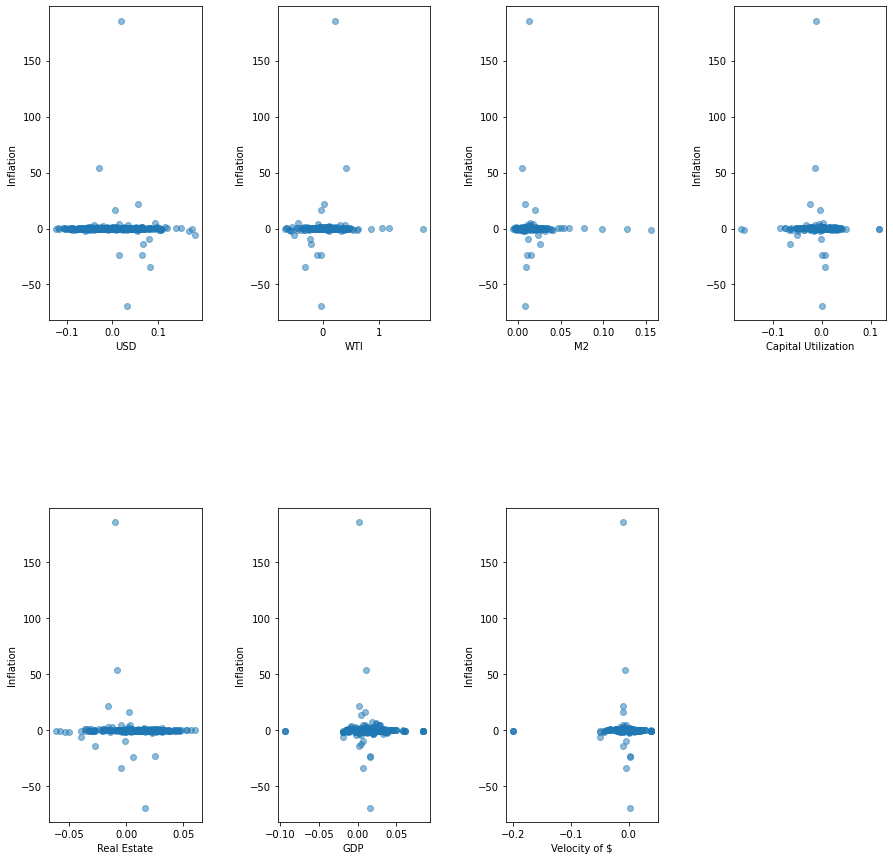

In [1019]:
# ~~~~~~~~~~~ Pulling Inflation on Percent Change w/ the variables on **2 Quarter Change** in Inflation ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

inflation_df_pctchange_2qrts = inflation_df.pct_change(periods=-6)

main_df_using_1qrtforvariables_2qrters4infl_pct_change = pd.concat([inflation_df_pctchange_2qrts,
                                       main_df_using_qrts],
                                      join='inner', # Added this~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                      axis=1, ignore_index=False) # Turned ignore_index to False ( originally True )~~~~~


main_df_using_1qrtforvariables_2qrters4infl_pct_change = main_df_using_1qrtforvariables_2qrters4infl_pct_change.fillna(method='ffill')
main_df_using_1qrtforvariables_2qrters4infl_pct_change.columns = [ 'Inflation', 'USD','WTI','M2','Capital Utilization','Real Estate','GDP','Velocity of $' ]
main_df_using_1qrtforvariables_2qrters4infl_pct_change.index.names = ["Date"]

# print(main_df_using_1qrtforvariables_2qrters4infl_pct_change.tail(10))

main_df_using_1qrtforvariables_2qrters4infl_pct_change = pd.DataFrame(main_df_using_1qrtforvariables_2qrters4infl_pct_change)
main_df_using_1qrtforvariables_2qrters4infl_pct_change.to_excel('data/1.0_Segmented_by_periods/main_df_using_1qrtforvariables_2qrters4infl_pct_change.xlsx')
print('Your done; check it out! ')

def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'Inflation', data=main_df_using_1qrtforvariables_2qrters4infl_pct_change, alpha=0.5)
        ax.set(xlabel=col, ylabel='Inflation')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

features = [x for x in main_df_using_1qrtforvariables_2qrters4infl_pct_change.columns if x not in ['Inflation']]
scatterplots(features, ncol=4, figsize=(15, 15))


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1284 entries, 1914-01-31 to 2020-12-31
Freq: M
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Inflation            1284 non-null   float64
 1   USD                  418 non-null    float64
 2   WTI                  450 non-null    float64
 3   M2                   480 non-null    float64
 4   Capital Utilization  645 non-null    float64
 5   Real Estate          405 non-null    float64
 6   GDP                  885 non-null    float64
 7   Velocity of $        741 non-null    float64
dtypes: float64(8)
memory usage: 130.3 KB


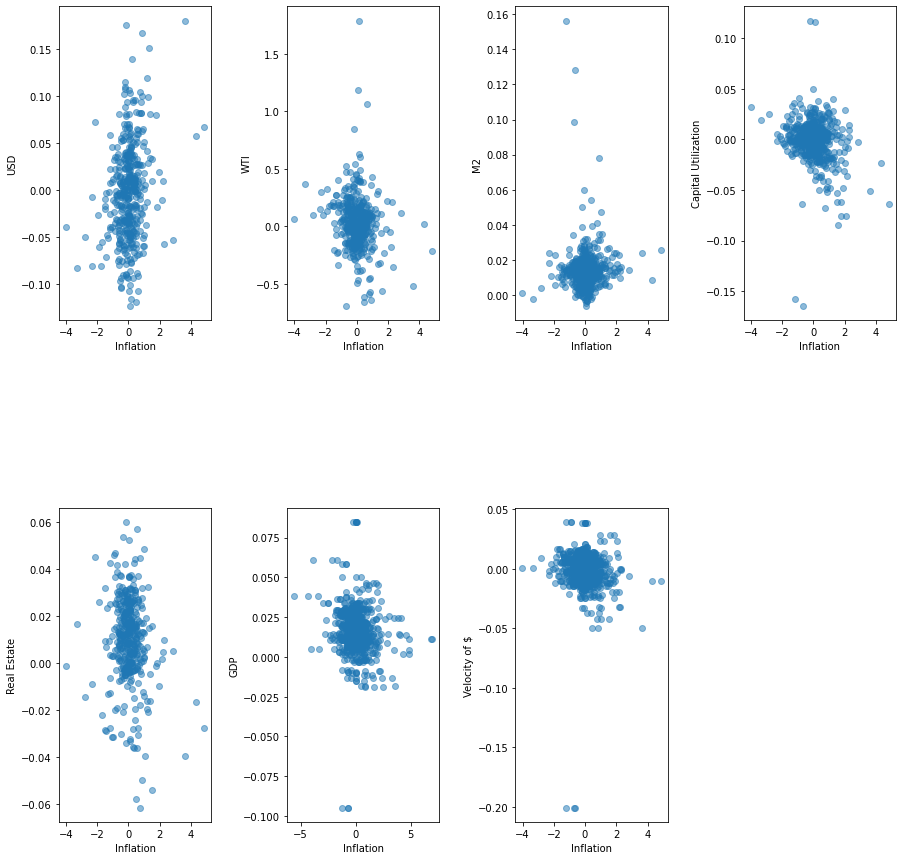

In [1024]:
# Using the % changes on ( 1 ) quarter basis
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = 'Inflation', y = col, data=main_df_using_qrts_w_infl_pct_change, alpha=0.5)
        ax.set(xlabel='Inflation', ylabel=col)
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

features = [x for x in main_df_using_qrts_w_infl_pct_change.columns if x not in ['Inflation']]
scatterplots(features, ncol=4, figsize=(15, 15))

main_df_using_qrts_w_infl_pct_change.info()


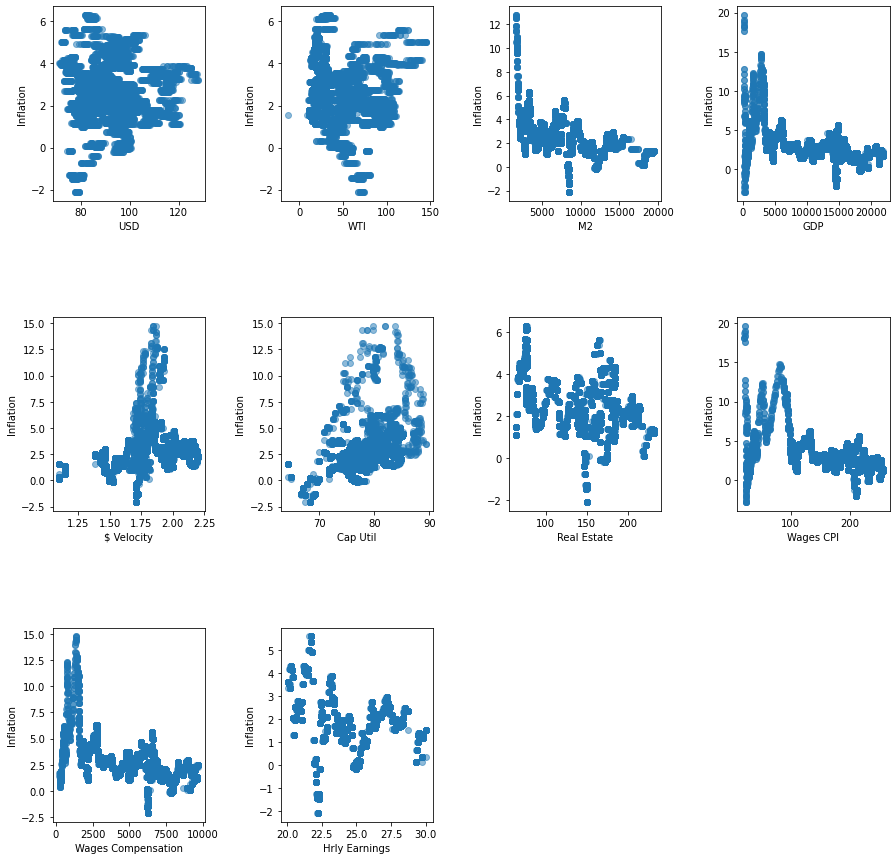

In [991]:
# Using the absolute values
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'Inflation', data=main_df, alpha=0.5)
        ax.set(xlabel=col, ylabel='Inflation')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

features = [x for x in main_df.columns if x not in ['Inflation']]
scatterplots(features, ncol=4, figsize=(15, 15))


**Inflation_Mnthly_Forward**

In [898]:
inflation_df_pct_mnth = inflation_df.pct_change(periods=-1)

# inflation_df_pct_mnth.tail()

# Printing to .xlsx

In [899]:
# This prints the MAINFRAME which is used for referance to confirm the "others"
main_df_excel = pd.DataFrame(main_df)

main_df_excel.to_excel('data/main_df_excel.xlsx')
print('finished check it out')

finished check it out


In [900]:
# This prints the QUARTERLY dataset
main_df_pct_qrtly_all_excel = pd.DataFrame(main_df_pct_qrtly_all)

main_df_pct_qrtly_all_excel.to_excel('data/1.0_Segmented_by_periods/by_quarter/main_df_quarterly_excel.xlsx')
print('finished check it out')

finished check it out


In [901]:
main_df_pct_mnth_all_excel = pd.DataFrame(main_df_pct_mnth_all)

main_df_pct_mnth_all_excel.to_excel('data/1.0_Segmented_by_periods/by_quarter/main_df_monthly_excel.xlsx')
print('finished check it out')

finished check it out


In [902]:
inflation_df_diff_qrt_excel = pd.DataFrame(inflation_df_diff_qrt)

inflation_df_diff_qrt_excel.to_excel('data/3.0 Inflation related/inflation_df_pct_qrt_excel.xlsx')
print('finished check it out')

finished check it out
